In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as smf
import statsmodels.formula.api as sm

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Salary_Data.csv to Salary_Data.csv


In [3]:
sd = pd.read_csv('Salary_Data.csv')
sd.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


#Performing EDA

In [4]:
sd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [5]:
sd.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [6]:
sd.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

In [7]:
sd[sd.duplicated()].shape

(0, 2)

In [8]:
sd[sd.duplicated()]

,YearsExperience,Salary


#Plotting the data

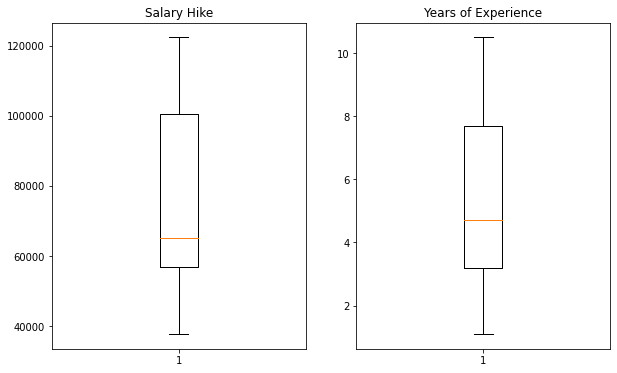

In [9]:
plt.subplots(figsize = (10,6))
plt.subplot(121)
plt.boxplot(sd['Salary'])
plt.title('Salary Hike')
plt.subplot(122)
plt.boxplot(sd['YearsExperience'])
plt.title('Years of Experience')
plt.show()

Hence there are no outliers in our data

#Check Correlation between variables

In [10]:
sd.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


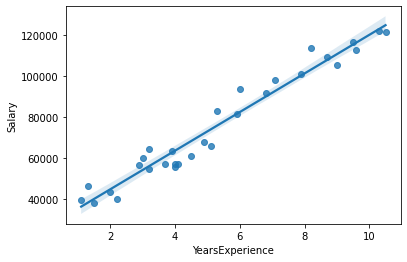

In [11]:
sns.regplot(sd['YearsExperience'],sd['Salary'])  
plt.show()

Hence there is good correlation between the two variable as score is 0.978242.

#Check for scedasticity

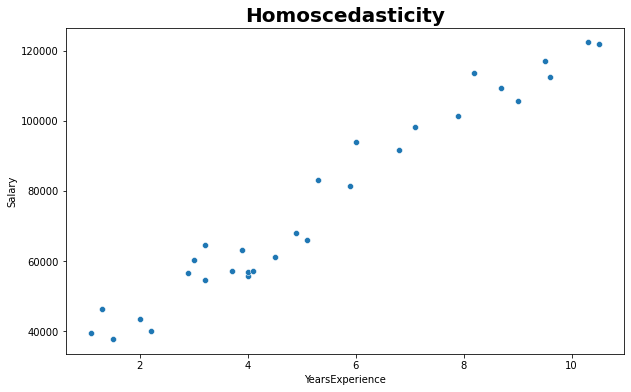

In [12]:
plt.figure(figsize = (10,6))
sns.scatterplot(x = sd['YearsExperience'], y = sd['Salary'])
plt.title('Homoscedasticity', fontweight = 'bold', fontsize = 20)
plt.show()

In [13]:
sd.var()

YearsExperience    8.053609e+00
Salary             7.515510e+08
dtype: float64

As the variation in data is constant and has no specific shape, we can consider it as Homoscedasticity.

#Building the model and applying Transformations 

In [14]:
sd.columns

Index(['YearsExperience', 'Salary'], dtype='object')

In [15]:
model = sm.ols('YearsExperience~Salary', data = sd).fit()

In [16]:
# Finding R_squared and Accuracy
model.rsquared, model.rsquared_adj, model.aic

(0.9569566641435086, 0.9554194021486339, 56.33643978306448)

As we can see our raw data model has Accuracy and R_squared_adjusted scores are excellent. But lets try making better with others Transformations.

**1) Square Root transformation**

In [23]:
model_sqrt = sm.ols('np.sqrt(YearsExperience)~np.sqrt(Salary)', data = sd).fit()

In [24]:
# Finding R_squared and Accuracy
model_sqrt.rsquared, model_sqrt.rsquared_adj, model_sqrt.aic

(0.9419490138976825, 0.9398757643940283, -24.297010414718805)

**2) Cube Root transformation**

In [25]:
model_cbrt = sm.ols('np.cbrt(YearsExperience)~np.cbrt(Salary)', data = sd).fit()

In [26]:
# Finding R_squared and Accuracy
model_cbrt.rsquared, model_cbrt.rsquared_adj, model_cbrt.aic

(0.9324434036761005, 0.9300306680931041, -58.986191415722146)

**3) Log transformation**

In [27]:
model_log = sm.ols('np.log(YearsExperience)~np.log(Salary)', data = sd).fit()

In [28]:
# Finding R_squared and Accuracy
model_log.rsquared, model_log.rsquared_adj, model_log.aic

(0.9052150725817153, 0.9018298966024908, -10.838995811550113)

Lets analyze Root Mean Squared Error (RMSE) between the model’s predicted target value and the actual target value.

In [29]:
from sklearn.metrics import mean_squared_error

In [30]:
square_root_pred_y =np.square(model_sqrt.predict(sd['Salary']))
cube_root_pred_y =pow(model_cbrt.predict(sd['Salary']),3)
log_model_pred_y =np.exp(model_log.predict(sd['Salary']))

In [31]:
rmse_sqrt =np.sqrt(mean_squared_error(sd['YearsExperience'], square_root_pred_y))
rmse_cbrt =np.sqrt(mean_squared_error(sd['YearsExperience'], cube_root_pred_y))
rmse_log =np.sqrt(mean_squared_error(sd['YearsExperience'], log_model_pred_y))

In [32]:
pred_y = model_sqrt.predict(sd['Salary'])
rmse_raw = np.sqrt(mean_squared_error(sd['YearsExperience'], pred_y))

#Table containing R_squared, RMSE & Accuracy values

In [33]:
models = {'Different_Models':['Raw data', 'Square Root Transformed Model', 'Cube Root Transformed Model', 'Log Transformed Model'],
        'R_squared':[model.rsquared,model_sqrt.rsquared,model_cbrt.rsquared,model_log.rsquared],
        'R_squared_adjusted':[model.rsquared_adj,model_sqrt.rsquared_adj,model_cbrt.rsquared_adj,model_log.rsquared_adj],
        'RMSE':[rmse_raw,rmse_sqrt,rmse_cbrt,rmse_log],
       'Accuracy':[model.aic,model_sqrt.aic,model_cbrt.aic,model_log.aic]}
model_table = pd.DataFrame(models)
model_table

,Different_Models,R_squared,R_squared_adjusted,RMSE,Accuracy
0,Raw data,0.956957,0.955419,3.798267,56.336440
1,Square Root Transformed Model,0.941949,0.939876,0.583215,-24.297010
2,Cube Root Transformed Model,0.932443,0.930031,0.591296,-58.986191
3,Log Transformed Model,0.905215,0.901830,0.637776,-10.838996


As Raw Data model has the good RMSE and highest R-squared score, we shall use this for prediction.

In [38]:
predicted = pd.DataFrame()
predicted['Salary'] = sd.Salary
predicted['YearsExperience'] = sd.YearsExperience
predicted['Predicted_YearsExperience'] = pd.DataFrame(model.predict(predicted.Salary))
predicted

,Salary,YearsExperience,Predicted_YearsExperience
0,39343.0,1.1,1.600934
1,46205.0,1.3,2.295819
2,37731.0,1.5,1.437694
3,43525.0,2.0,2.024427
4,39891.0,2.2,1.656428
5,56642.0,2.9,3.352729
6,60150.0,3.0,3.707969
7,54445.0,3.2,3.130248
8,64445.0,3.2,4.142905
9,57189.0,3.7,3.408121


**Hence, we conclude that Raw Data model is much better.**